In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
library("FactoMineR")
library("factoextra")
library("corrplot")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.94 loaded



In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.annotation*"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec_txt_fpath = Sys.glob(txt_fglob)
vec_txt_fname = basename(vec_txt_fpath)

vec = vec_txt_fname
print(vec)

 [1] "matrix.annotation.chipseq_flagship.tsv"                 
 [2] "matrix.annotation.chipseq_full.tsv"                     
 [3] "matrix.annotation.chipseq_histone.tsv"                  
 [4] "matrix.annotation.chipseq_subset.tsv"                   
 [5] "matrix.annotation.fcc_peak_call.tsv"                    
 [6] "matrix.annotation.genome_tss.tsv"                       
 [7] "matrix.annotation.merge.chipseq_full.fcc.tss.tsv"       
 [8] "matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv" 
 [9] "matrix.annotation.prepare.cre.chipseq_full.fcc.tsv"     
[10] "matrix.annotation.prepare.cre.chipseq_full.only.tsv"    
[11] "matrix.annotation.prepare.enh.chipseq_full.fcc.tss.tsv" 
[12] "matrix.annotation.prepare.enh.chipseq_full.fcc.tsv"     
[13] "matrix.annotation.prepare.enh.chipseq_full.only.tsv"    
[14] "matrix.annotation.prepare.full.chipseq_full.fcc.tss.tsv"
[15] "matrix.annotation.prepare.full.chipseq_full.fcc.tsv"    
[16] "matrix.annotation.prepare.full.chipseq_full.only.

## Import data

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

mat = read_tsv(txt_fpath, show_col_types = FALSE)
mat = mat %>% tibble::column_to_rownames("Region")

mat_region_annot = mat
print(dim(mat))
fun_display_table(head(mat, 3))

[1] 115953    536


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,TSS,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,ASH1L,ATF1,ATF2,ATF3,ATF4,ATF6,ATF7,BACH1,BCL6,BCLAF1,BCOR,BDP1,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF1,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CBX8,CC2D1A,CCAR2,CCNT2,CDC5L,CEBPB,CEBPG,CEBPZ,CGGBP1,CHAMP1,CHCHD3,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREB5,CREBBP,CREM,CSDE1,CTBP1,CTCF,CTCFL,CUX1,CXXC5,DACH1,DDIT3,DDX20,DEAF1,DIDO1,DLX4,DMBX1,DMTF1,DNMT1,DPF2,E2F1,E2F3,E2F4,E2F5,E2F6,E2F7,E2F8,E4F1,EGR1,EHMT2,ELF1,ELF2,ELF4,ELK1,ELK3,EP300,EP400,ERF,ESRRA,ESRRB,ETS1,ETS2,ETV1,ETV5,ETV6,EWSR1,EZH2,FIP1L1,FOS,FOSL1,FOXA1,FOXA3,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO4,FOXP1,FOXP4,FUS,GABPA,GABPB1,GABPB2,GATA1,GATA2,GATAD2A,GATAD2B,GMEB1,GTF2A2,GTF2B,GTF2E2,GTF2F1,GTF2I,GTF3C2,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDAC8,HDGF,HES1,HEY1,HINFP,HIVEP1,HLTF,HMBOX1,HMG20A,HMG20B,HMGN3,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HOMEZ,HOXB6,HSF4,ID3,IFI16,IKZF1,ILF3,ILK,IRF1,IRF2,IRF9,JUN,JUNB,JUND,KAT2B,KAT7,KAT8,KDM1A,KDM2B,KDM4B,KDM5B,KHSRP,KLF1,KLF10,KLF13,KLF16,KLF6,L3MBTL2,LARP7,LCOR,LEF1,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM2,MCM3,MCM5,MCM7,MECOM,MEF2A,MEF2D,MEIS2,MGA,MIER1,MITF,MLLT1,MLX,MNT,MTA1,MTA2,MTA3,MTF1,MXD1,MXI1,MYBL2,MYC,MYNN,NBN,NCOA1,NCOA2,NCOA4,NCOA6,NCOR1,NELFE,NEUROD1,NFATC3,NFE2,NFE2L1,NFIC,NFIX,NFRKB,NFXL1,NFYA,NFYB,NKRF,NONO,NR0B1,NR1H2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NRF1,NUFIP1,OTX1,PATZ1,PBX2,PCBP1,PCBP2,PHB,PHB2,PHF20,PHF21A,PHF8,PHTF2,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POLR3A,POLR3G,POU5F1,PPARD,PRDM10,PRMT5,PRPF4,PTBP1,PTRF,PTTG1,PURB,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RBPJ,RCOR1,RELA,REST,RFX1,RFX5,RFX7,RHOXF2B,RLF,RNF2,RNF219,RREB1,RUNX1,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX5,SKIL,SLC30A9,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNAPC5,SNIP1,SNRNP70,SOX6,SP1,SP2,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF7,STAG1,STAT5A,STAT5B,SUPT5H,SUZ12,TAF1,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBPL1,TBX18,TCF12,TCF15,TCF3,TCF7,TCF7L2,TCFL5,TEAD1,TEAD2,TEAD4,TFAM,TFAP4,TFCP2,TFDP1,TFE3,TGIF2,THAP1,THAP12,THAP7,THRA,THRAP3,THRB,TOE1,TRIM24,TRIM25,TRIM28,TRIP13,TSC22D4,TSHZ1,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WHSC1,XRCC3,XRCC4,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB11,ZBTB12,ZBTB17,ZBTB2,ZBTB26,ZBTB33,ZBTB34,ZBTB40,ZBTB49,ZBTB5,ZBTB7A,ZBTB8A,ZBTB9,ZC3H11A,ZC3H4,ZC3H8,ZEB2,ZFP1,ZFP30,ZFP36,ZFP91,ZFPM2,ZFX,ZHX1,ZKSCAN1,ZKSCAN3,ZKSCAN8,ZMIZ1,ZMYM3,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF140,ZNF143,ZNF146,ZNF148,ZNF165,ZNF174,ZNF175,ZNF184,ZNF197,ZNF212,ZNF215,ZNF217,ZNF224,ZNF23,ZNF232,ZNF239,ZNF24,ZNF253,ZNF257,ZNF263,ZNF274,ZNF277,ZNF280A,ZNF280B,ZNF281,ZNF282,ZNF3,ZNF311,ZNF316,ZNF318,ZNF319,ZNF324,ZNF347,ZNF354B,ZNF354C,ZNF384,ZNF395,ZNF397,ZNF398,ZNF407,ZNF408,ZNF41,ZNF431,ZNF436,ZNF444,ZNF445,ZNF449,ZNF507,ZNF511,ZNF512,ZNF518B,ZNF551,ZNF561,ZNF57,ZNF583,ZNF584,ZNF586,ZNF589,ZNF592,ZNF639,ZNF644,ZNF655,ZNF668,ZNF695,ZNF696,ZNF699,ZNF7,ZNF700,ZNF707,ZNF717,ZNF740,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Prepare

In [5]:
mat = mat_region_annot
vec = apply(mat, 2, sum)
idx = which(vec != 0)

mat = mat[,idx]
vec = rownames(mat)
lst = lapply(mat, as.factor)
mat = bind_cols(lst)
mat = data.frame(mat)
rownames(mat) = vec

mat_region_annot_prep = mat
print(dim(mat))
head(mat, 3)

[1] 115953    536


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi.HCRFF.CASA,CRISPRi.Growth.Signif,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:17288-17689,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Test MCA

In [6]:
mat = mat_region_annot_prep
res = MCA(mat, ncp = 2, graph = FALSE)

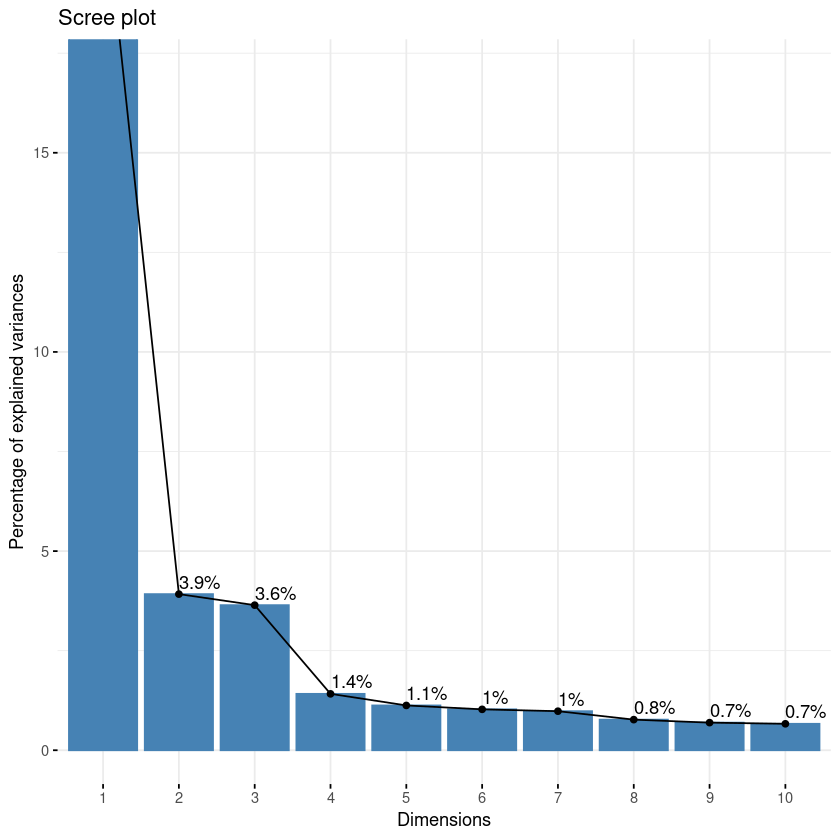

In [7]:
options(repr.plot.width = 7, repr.plot.height=7)
fviz_screeplot(res, addlabels = TRUE, ylim = c(0, 17))

In [7]:
lst = get_mca_ind(res)
mat = lst$coord
dat = mat %>% as.data.frame %>% rownames_to_column(var = "Region")
head(dat)

,Region,Dim 1,Dim 2
,<chr>,<dbl>,<dbl>
1,chr1:10038-10405,-0.2647560,0.062385644
2,chr1:16025-16338,-0.2801490,0.027007404
3,chr1:17288-17689,-0.2640626,0.007512494
4,chr1:28934-29499,-0.2758647,0.015797878
5,chr1:115429-115969,0.2486665,0.018464486
6,chr1:136201-137353,-0.2176355,0.003951636


In [11]:
mat = mat_region_annot_prep
res = MCA(mat, ncp = 10, graph = FALSE)

In [12]:
lst = get_mca_ind(res)
mat = lst$coord
dat = mat %>% as.data.frame %>% rownames_to_column(var = "Region")
head(dat)

,Region,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1:10038-10405,-0.2647560,0.062385644,0.08426053,0.09818505,0.01130233,-0.049987613,0.014265717,-0.02679434,-0.0158845401,-0.027493189
2,chr1:16025-16338,-0.2801490,0.027007404,0.07445988,0.03061744,0.04785225,0.005001455,-0.011195796,-0.01274336,-0.0162521278,-0.015104969
3,chr1:17288-17689,-0.2640626,0.007512494,0.08153790,0.01220207,0.03525059,-0.058194818,-0.011339720,-0.05128954,0.0020620506,-0.001962586
4,chr1:28934-29499,-0.2758647,0.015797878,0.08048188,0.01955483,0.04378353,-0.052487097,-0.023823975,-0.02981407,0.0002297285,-0.007191016
5,chr1:115429-115969,0.2486665,0.018464486,-0.39082611,0.16216499,-0.04133549,-0.088161106,-0.003752129,-0.02243841,-0.0188029640,0.126939799
6,chr1:136201-137353,-0.2176355,0.003951636,0.04126784,-0.00682543,0.02056251,-0.039269148,-0.003477829,-0.02608376,0.0083890950,-0.011749872


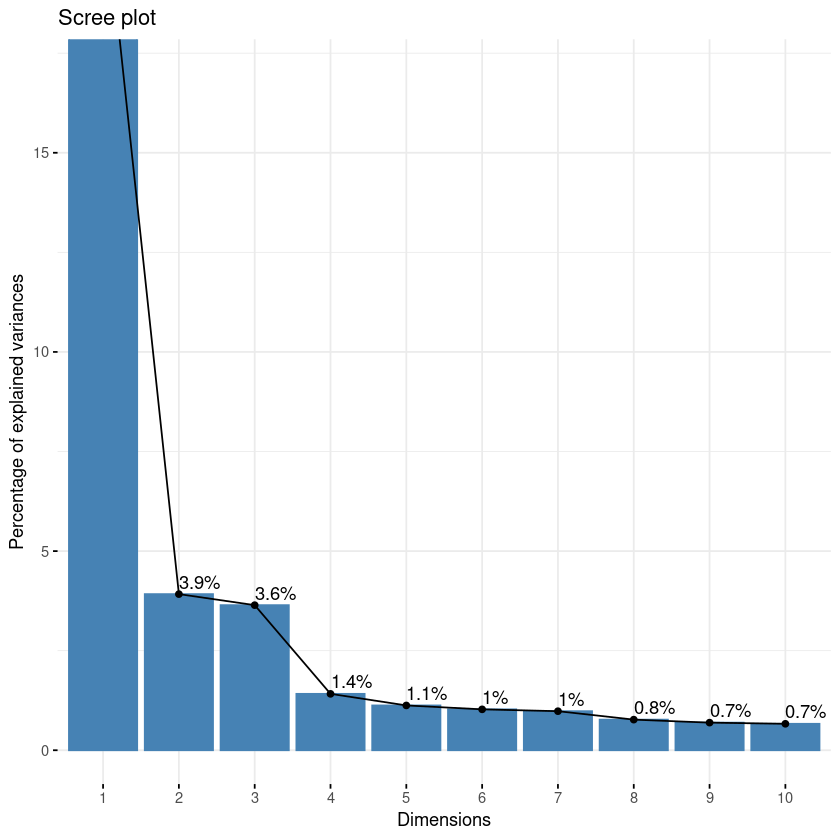

In [13]:
options(repr.plot.width = 7, repr.plot.height=7)
fviz_screeplot(res, addlabels = TRUE, ylim = c(0, 17))

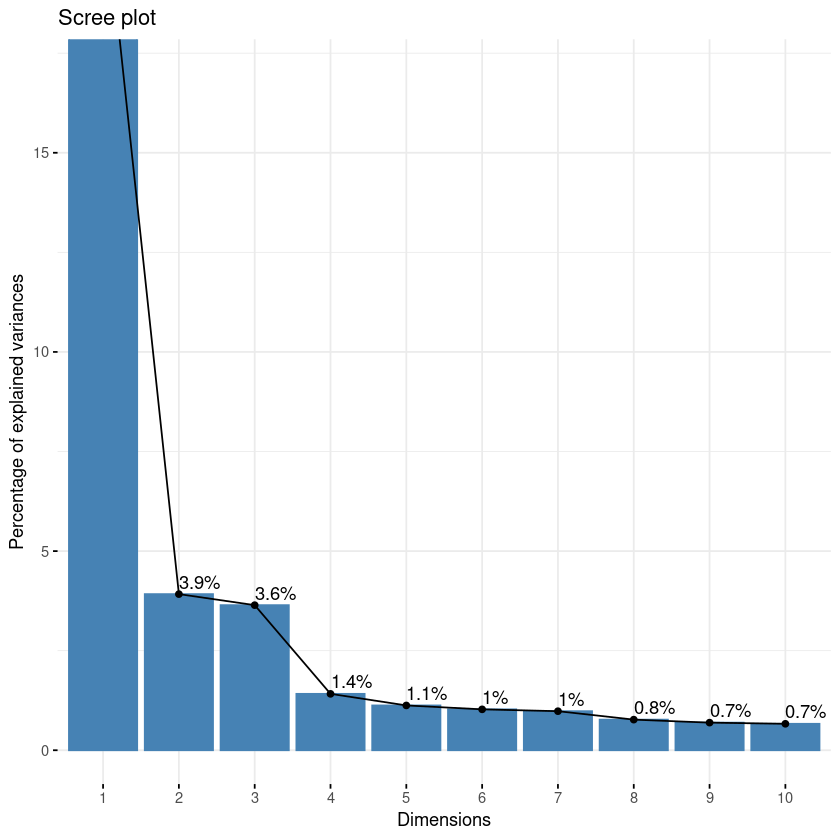

In [10]:
options(repr.plot.width = 7, repr.plot.height=7)
fviz_screeplot(res, addlabels = TRUE, ylim = c(0, 17))

In [ ]:
res = res_mca_region_annot
lst = get_mca_ind(res)
mat = lst$coord
dat = mat %>% as.data.frame %>% rownames_to_column(var = "Region")

dat_region_annot_mca = dat
print(lst)
cat("\n", dim(dat), "\n")
head(dat, 3)

In [ ]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = paste("matrix", "mca_exp90", "prepare.cre", "chipseq_full.fcc.tss", "tsv", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fname)

#dat = mat_annot_merge_full_tot
#dat = dat %>% 
#    dplyr::filter(Chrom == "chrX") %>%
#    dplyr::select(-Chrom, -ChromStart, -ChromEnd)

dat = dat_region_annot_mca

print(dim(dat))
fun_display_table(head(dat, 3))
write_tsv(dat, txt_fpath)

## Test MCA

In [6]:
mat = mat_region_annot
vec = apply(mat, 2, sum)
idx = which(vec != 0)

mat = mat[,idx]
vec = rownames(mat)
lst = lapply(mat, as.factor)
mat = bind_cols(lst)
mat = data.frame(mat)
rownames(mat) = vec

mat_region_annot_prep = mat
print(dim(mat))
head(mat, 3)

[1] 115953    536


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi.HCRFF.CASA,CRISPRi.Growth.Signif,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:17288-17689,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
mat = mat_region_annot_prep
res = MCA(mat, ncp = 2, graph = FALSE)

mat = get_eigenvalue(res)
vec = mat[,"cumulative.variance.percent"]

idx = which(vec < 90)
num = max(idx)
num_dim_exp90 = num
cat("90%: #Dim=", num, "\n")

idx = which(vec < 80)
num = max(idx)
num_dim_exp80 = num
cat("80%: #Dim=", num, "\n")

idx = which(vec < 70)
num = max(idx)
num_dim_exp70 = num
cat("70%: #Dim=", num, "\n")

90%: #Dim= 379 
80%: #Dim= 272 
70%: #Dim= 185 


In [13]:
mat = get_eigenvalue(res)
vec = mat[,"cumulative.variance.percent"]
vec[50]

Dim.50 
48.58753

In [14]:
mat = mat_region_annot_prep
res = MCA(mat, ncp = 2, graph = FALSE)

mat = get_eigenvalue(res)
vec = mat[,"cumulative.variance.percent"]
idx = which(vec < 90)
num = max(idx)

mat = mat_region_annot_prep
res = MCA(mat, ncp = num, graph = FALSE)

res_mca_region_annot = res
cat("#Dim =", num, "\n\n")
print(res)

#Dim = 379 

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 115953 individuals, described by 536 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$var$eta2"       "coord. of variables"             
8  "$ind"            "results for the individuals"     
9  "$ind$coord"      "coord. for the individuals"      
10 "$ind$cos2"       "cos2 for the individuals"        
11 "$ind$contrib"    "contributions of the individuals"
12 "$call"           "intermediate results"            
13 "$call$marge.col" "weights of columns"              
14 "$call$marg

In [15]:
res = res_mca_region_annot
lst = get_mca_ind(res)
mat = lst$coord
dat = mat %>% as.data.frame %>% rownames_to_column(var = "Region")

dat_region_annot_mca = dat
print(lst)
cat("\n", dim(dat), "\n")
head(dat, 3)

Multiple Correspondence Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

 115953 380 


,Region,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,⋯,Dim 370,Dim 371,Dim 372,Dim 373,Dim 374,Dim 375,Dim 376,Dim 377,Dim 378,Dim 379
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1:10038-10405,-0.2647560,0.062385644,0.08426053,0.09818505,0.01130233,-0.049987613,0.01426572,-0.02679434,-0.015884540,⋯,0.0178508630,0.012618848,0.001007931,-0.004014059,-0.003760175,0.001101036,-0.009047376,-0.0002072114,0.009417066,0.003119385
2,chr1:16025-16338,-0.2801490,0.027007404,0.07445988,0.03061744,0.04785225,0.005001455,-0.01119580,-0.01274336,-0.016252128,⋯,-0.0118739904,-0.007190518,0.001402404,0.006253458,-0.002504366,-0.007076162,0.004166283,0.0068524363,0.007820836,-0.002168246
3,chr1:17288-17689,-0.2640626,0.007512494,0.08153790,0.01220207,0.03525059,-0.058194818,-0.01133972,-0.05128954,0.002062051,⋯,-0.0004174641,0.001966306,-0.005238515,0.003029279,0.005695004,-0.010618784,0.006920942,-0.0093013992,-0.002554099,-0.002413561


## Export results

In [11]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = paste("matrix", "mca_exp90", "prepare.cre", "chipseq_full.fcc.tss", "tsv", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fname)

#dat = mat_annot_merge_full_tot
#dat = dat %>% 
#    dplyr::filter(Chrom == "chrX") %>%
#    dplyr::select(-Chrom, -ChromStart, -ChromEnd)

dat = dat_region_annot_mca

print(dim(dat))
fun_display_table(head(dat, 3))
write_tsv(dat, txt_fpath)

[1] "matrix.mca_exp90.prepare.cre.chipseq_full.fcc.tss.tsv"
[1] 115953    380


Region,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,Dim 11,Dim 12,Dim 13,Dim 14,Dim 15,Dim 16,Dim 17,Dim 18,Dim 19,Dim 20,Dim 21,Dim 22,Dim 23,Dim 24,Dim 25,Dim 26,Dim 27,Dim 28,Dim 29,Dim 30,Dim 31,Dim 32,Dim 33,Dim 34,Dim 35,Dim 36,Dim 37,Dim 38,Dim 39,Dim 40,Dim 41,Dim 42,Dim 43,Dim 44,Dim 45,Dim 46,Dim 47,Dim 48,Dim 49,Dim 50,Dim 51,Dim 52,Dim 53,Dim 54,Dim 55,Dim 56,Dim 57,Dim 58,Dim 59,Dim 60,Dim 61,Dim 62,Dim 63,Dim 64,Dim 65,Dim 66,Dim 67,Dim 68,Dim 69,Dim 70,Dim 71,Dim 72,Dim 73,Dim 74,Dim 75,Dim 76,Dim 77,Dim 78,Dim 79,Dim 80,Dim 81,Dim 82,Dim 83,Dim 84,Dim 85,Dim 86,Dim 87,Dim 88,Dim 89,Dim 90,Dim 91,Dim 92,Dim 93,Dim 94,Dim 95,Dim 96,Dim 97,Dim 98,Dim 99,Dim 100,Dim 101,Dim 102,Dim 103,Dim 104,Dim 105,Dim 106,Dim 107,Dim 108,Dim 109,Dim 110,Dim 111,Dim 112,Dim 113,Dim 114,Dim 115,Dim 116,Dim 117,Dim 118,Dim 119,Dim 120,Dim 121,Dim 122,Dim 123,Dim 124,Dim 125,Dim 126,Dim 127,Dim 128,Dim 129,Dim 130,Dim 131,Dim 132,Dim 133,Dim 134,Dim 135,Dim 136,Dim 137,Dim 138,Dim 139,Dim 140,Dim 141,Dim 142,Dim 143,Dim 144,Dim 145,Dim 146,Dim 147,Dim 148,Dim 149,Dim 150,Dim 151,Dim 152,Dim 153,Dim 154,Dim 155,Dim 156,Dim 157,Dim 158,Dim 159,Dim 160,Dim 161,Dim 162,Dim 163,Dim 164,Dim 165,Dim 166,Dim 167,Dim 168,Dim 169,Dim 170,Dim 171,Dim 172,Dim 173,Dim 174,Dim 175,Dim 176,Dim 177,Dim 178,Dim 179,Dim 180,Dim 181,Dim 182,Dim 183,Dim 184,Dim 185,Dim 186,Dim 187,Dim 188,Dim 189,Dim 190,Dim 191,Dim 192,Dim 193,Dim 194,Dim 195,Dim 196,Dim 197,Dim 198,Dim 199,Dim 200,Dim 201,Dim 202,Dim 203,Dim 204,Dim 205,Dim 206,Dim 207,Dim 208,Dim 209,Dim 210,Dim 211,Dim 212,Dim 213,Dim 214,Dim 215,Dim 216,Dim 217,Dim 218,Dim 219,Dim 220,Dim 221,Dim 222,Dim 223,Dim 224,Dim 225,Dim 226,Dim 227,Dim 228,Dim 229,Dim 230,Dim 231,Dim 232,Dim 233,Dim 234,Dim 235,Dim 236,Dim 237,Dim 238,Dim 239,Dim 240,Dim 241,Dim 242,Dim 243,Dim 244,Dim 245,Dim 246,Dim 247,Dim 248,Dim 249,Dim 250,Dim 251,Dim 252,Dim 253,Dim 254,Dim 255,Dim 256,Dim 257,Dim 258,Dim 259,Dim 260,Dim 261,Dim 262,Dim 263,Dim 264,Dim 265,Dim 266,Dim 267,Dim 268,Dim 269,Dim 270,Dim 271,Dim 272,Dim 273,Dim 274,Dim 275,Dim 276,Dim 277,Dim 278,Dim 279,Dim 280,Dim 281,Dim 282,Dim 283,Dim 284,Dim 285,Dim 286,Dim 287,Dim 288,Dim 289,Dim 290,Dim 291,Dim 292,Dim 293,Dim 294,Dim 295,Dim 296,Dim 297,Dim 298,Dim 299,Dim 300,Dim 301,Dim 302,Dim 303,Dim 304,Dim 305,Dim 306,Dim 307,Dim 308,Dim 309,Dim 310,Dim 311,Dim 312,Dim 313,Dim 314,Dim 315,Dim 316,Dim 317,Dim 318,Dim 319,Dim 320,Dim 321,Dim 322,Dim 323,Dim 324,Dim 325,Dim 326,Dim 327,Dim 328,Dim 329,Dim 330,Dim 331,Dim 332,Dim 333,Dim 334,Dim 335,Dim 336,Dim 337,Dim 338,Dim 339,Dim 340,Dim 341,Dim 342,Dim 343,Dim 344,Dim 345,Dim 346,Dim 347,Dim 348,Dim 349,Dim 350,Dim 351,Dim 352,Dim 353,Dim 354,Dim 355,Dim 356,Dim 357,Dim 358,Dim 359,Dim 360,Dim 361,Dim 362,Dim 363,Dim 364,Dim 365,Dim 366,Dim 367,Dim 368,Dim 369,Dim 370,Dim 371,Dim 372,Dim 373,Dim 374,Dim 375,Dim 376,Dim 377,Dim 378,Dim 379
chr1:10038-10405,-0.2647560,0.0623856,0.0842605,0.0981851,0.0113023,-0.0499876,0.0142657,-0.0267943,-0.0158845,-0.0274932,0.0417652,0.0741406,-0.0012531,0.0234688,0.0481509,-0.0403734,0.1061758,0.0145266,0.1004043,0.0246923,-0.0332103,0.0068040,0.1045444,-0.1030396,-0.1400503,0.0427903,-0.1614948,-0.1221397,0.0148038,-0.0282954,0.1117071,0.0409871,0.0986313,-0.0913534,0.0207421,0.0490301,0.1033280,0.0366391,-0.1296074,-0.0448268,0.0062609,0.1709933,0.1103614,0.0196194,-0.0596959,-0.0989221,0.0278506,0.1455979,-0.1741938,0.0066060,-0.0087927,-0.1774180,-0.0040540,0.1152759,0.1489846,-0.2013561,-0.0727475,-0.1325416,-0.0061685,-0.0534789,0.1419474,0.1708293,-0.2156335,0.0562441,-0.0528695,0.0227260,0.1211758,-0.0810236,-0.0143530,0.2718490,-0.2807156,-0.0866872,-0.1134165,-0.1418151,0.0705725,-0.0279690,-0.0501366,-0.0446925,-0.0921438,0.3915627,-0.0094516,-0.3297788,-0.1732282,0.0550087,-0.0383941,0.2556745,0.1892342,-0.1738554,0.0943029,0.1244750,-0.1128109,-0.1071638,-0.0545219,-0.1196004,-0.0289860,0.1311373,0.0325754,0.1600008,0.1158151,0.0140106,-0.

In [15]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = paste("matrix", "mca_dim50", "prepare.cre", "chipseq_full.fcc.tss", "tsv", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fname)

#dat = mat_annot_merge_full_tot
#dat = dat %>% 
#    dplyr::filter(Chrom == "chrX") %>%
#    dplyr::select(-Chrom, -ChromStart, -ChromEnd)

dat = dat_region_annot_mca
dat = dat[,1:51]

print(dim(dat))
fun_display_table(head(dat, 3))
write_tsv(dat, txt_fpath)

[1] "matrix.mca_dim50.prepare.cre.chipseq_full.fcc.tss.tsv"
[1] 115953     51


Region,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,Dim 11,Dim 12,Dim 13,Dim 14,Dim 15,Dim 16,Dim 17,Dim 18,Dim 19,Dim 20,Dim 21,Dim 22,Dim 23,Dim 24,Dim 25,Dim 26,Dim 27,Dim 28,Dim 29,Dim 30,Dim 31,Dim 32,Dim 33,Dim 34,Dim 35,Dim 36,Dim 37,Dim 38,Dim 39,Dim 40,Dim 41,Dim 42,Dim 43,Dim 44,Dim 45,Dim 46,Dim 47,Dim 48,Dim 49,Dim 50
chr1:10038-10405,-0.2647560,0.0623856,0.0842605,0.0981851,0.0113023,-0.0499876,0.0142657,-0.0267943,-0.0158845,-0.0274932,0.0417652,0.0741406,-0.0012531,0.0234688,0.0481509,-0.0403734,0.1061758,0.0145266,0.1004043,0.0246923,-0.0332103,0.0068040,0.1045444,-0.1030396,-0.1400503,0.0427903,-0.1614948,-0.1221397,0.0148038,-0.0282954,0.1117071,0.0409871,0.0986313,-0.0913534,0.0207421,0.0490301,0.1033280,0.0366391,-0.1296074,-0.0448268,0.0062609,0.1709933,0.1103614,0.0196194,-0.0596959,-0.0989221,0.0278506,0.1455979,-0.1741938,0.0066060
chr1:16025-16338,-0.2801490,0.0270074,0.0744599,0.0306174,0.0478522,0.0050015,-0.0111958,-0.0127434,-0.0162521,-0.0151050,0.0055067,-0.0290674,0.0057348,-0.0003704,-0.0102089,-0.0016941,-0.0190078,0.0111618,-0.0291127,-0.0025556,0.0261386,0.0224265,0.0176254,0.0096002,-0.0056346,0.0076630,-0.0226329,-0.0085669,-0.0049175,0.0006182,0.0122051,0.0007224,0.0101962,-0.0018972,0.0127160,0.0037062,0.0028740,0.0029651,0.0177653,-0.0141590,0.0029242,0.0058209,0.0264249,0.0019382,0.0161344,0.0187354,0.0031695,0.0045266,-0.0034571,-0.0265745
chr1:17288-17689,-0.2640626,0.0075125,0.0815379,0.0122021,0.0352506,-0.0581948,-0.0113397,-0.0512895,0.0020621,-0.0019626,0.0112455,-0.0213120,0.0106277,0.0044020,0.0030200,-0.0131251,-0.0146377,0.0010909,-0.0351141,0.0000923,0.0154673,0.0229592,0.0152164,0.0064239,-0.0286584,0.0093417,-0.0100744,-0.0087447,0.0015981,-0.0100279,-0.0100438,-0.0143285,0.0008424,-0.0103333,-0.0064355,0.0199186,-0.0079019,0.0210229,0.0000240,-0.0046041,-0.0125815,0.0092532,0.0159222,-0.0124152,0.0153591,0.0182419,0.0250767,0.0007432,0.0003586,0.0081673


In [16]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = paste("matrix", "mca_dim70", "prepare.cre", "chipseq_full.fcc.tss", "tsv", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fname)

#dat = mat_annot_merge_full_tot
#dat = dat %>% 
#    dplyr::filter(Chrom == "chrX") %>%
#    dplyr::select(-Chrom, -ChromStart, -ChromEnd)

dat = dat_region_annot_mca
dat = dat[,1:71]

print(dim(dat))
fun_display_table(head(dat, 3))
write_tsv(dat, txt_fpath)

[1] "matrix.mca_dim70.prepare.cre.chipseq_full.fcc.tss.tsv"
[1] 115953     71


Region,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,Dim 11,Dim 12,Dim 13,Dim 14,Dim 15,Dim 16,Dim 17,Dim 18,Dim 19,Dim 20,Dim 21,Dim 22,Dim 23,Dim 24,Dim 25,Dim 26,Dim 27,Dim 28,Dim 29,Dim 30,Dim 31,Dim 32,Dim 33,Dim 34,Dim 35,Dim 36,Dim 37,Dim 38,Dim 39,Dim 40,Dim 41,Dim 42,Dim 43,Dim 44,Dim 45,Dim 46,Dim 47,Dim 48,Dim 49,Dim 50,Dim 51,Dim 52,Dim 53,Dim 54,Dim 55,Dim 56,Dim 57,Dim 58,Dim 59,Dim 60,Dim 61,Dim 62,Dim 63,Dim 64,Dim 65,Dim 66,Dim 67,Dim 68,Dim 69,Dim 70
chr1:10038-10405,-0.2647560,0.0623856,0.0842605,0.0981851,0.0113023,-0.0499876,0.0142657,-0.0267943,-0.0158845,-0.0274932,0.0417652,0.0741406,-0.0012531,0.0234688,0.0481509,-0.0403734,0.1061758,0.0145266,0.1004043,0.0246923,-0.0332103,0.0068040,0.1045444,-0.1030396,-0.1400503,0.0427903,-0.1614948,-0.1221397,0.0148038,-0.0282954,0.1117071,0.0409871,0.0986313,-0.0913534,0.0207421,0.0490301,0.1033280,0.0366391,-0.1296074,-0.0448268,0.0062609,0.1709933,0.1103614,0.0196194,-0.0596959,-0.0989221,0.0278506,0.1455979,-0.1741938,0.0066060,-0.0087927,-0.1774180,-0.0040540,0.1152759,0.1489846,-0.2013561,-0.0727475,-0.1325416,-0.0061685,-0.0534789,0.1419474,0.1708293,-0.2156335,0.0562441,-0.0528695,0.0227260,0.1211758,-0.0810236,-0.0143530,0.2718490
chr1:16025-16338,-0.2801490,0.0270074,0.0744599,0.0306174,0.0478522,0.0050015,-0.0111958,-0.0127434,-0.0162521,-0.0151050,0.0055067,-0.0290674,0.0057348,-0.0003704,-0.0102089,-0.0016941,-0.0190078,0.0111618,-0.0291127,-0.0025556,0.0261386,0.0224265,0.0176254,0.0096002,-0.0056346,0.0076630,-0.0226329,-0.0085669,-0.0049175,0.0006182,0.0122051,0.0007224,0.0101962,-0.0018972,0.0127160,0.0037062,0.0028740,0.0029651,0.0177653,-0.0141590,0.0029242,0.0058209,0.0264249,0.0019382,0.0161344,0.0187354,0.0031695,0.0045266,-0.0034571,-0.0265745,-0.0193050,-0.0156336,0.0301448,-0.0083706,-0.0021208,-0.0059830,0.0052903,0.0202561,-0.0140162,-0.0069624,0.0027140,0.0061177,-0.0039713,0.0158935,-0.0186984,-0.0182883,-0.0046315,-0.0178879,-0.0050410,0.0013300
chr1:17288-17689,-0.2640626,0.0075125,0.0815379,0.0122021,0.0352506,-0.0581948,-0.0113397,-0.0512895,0.0020621,-0.0019626,0.0112455,-0.0213120,0.0106277,0.0044020,0.0030200,-0.0131251,-0.0146377,0.0010909,-0.0351141,0.0000923,0.0154673,0.0229592,0.0152164,0.0064239,-0.0286584,0.0093417,-0.0100744,-0.0087447,0.0015981,-0.0100279,-0.0100438,-0.0143285,0.0008424,-0.0103333,-0.0064355,0.0199186,-0.0079019,0.0210229,0.0000240,-0.0046041,-0.0125815,0.0092532,0.0159222,-0.0124152,0.0153591,0.0182419,0.0250767,0.0007432,0.0003586,0.0081673,-0.0077639,-0.0115268,0.0064292,0.0016639,0.0100949,0.0035737,-0.0025997,0.0071336,-0.0135761,-0.0106600,0.0010436,0.0063066,0.0083833,-0.0020435,0.0099997,-0.0042414,-0.0004759,0.0004469,0.0039939,0.0024538


In [17]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = paste("matrix", "mca_dim90", "prepare.cre", "chipseq_full.fcc.tss", "tsv", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fname)

#dat = mat_annot_merge_full_tot
#dat = dat %>% 
#    dplyr::filter(Chrom == "chrX") %>%
#    dplyr::select(-Chrom, -ChromStart, -ChromEnd)

dat = dat_region_annot_mca
dat = dat[,1:91]

print(dim(dat))
fun_display_table(head(dat, 3))
write_tsv(dat, txt_fpath)

[1] "matrix.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
[1] 115953     91


Region,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,Dim 11,Dim 12,Dim 13,Dim 14,Dim 15,Dim 16,Dim 17,Dim 18,Dim 19,Dim 20,Dim 21,Dim 22,Dim 23,Dim 24,Dim 25,Dim 26,Dim 27,Dim 28,Dim 29,Dim 30,Dim 31,Dim 32,Dim 33,Dim 34,Dim 35,Dim 36,Dim 37,Dim 38,Dim 39,Dim 40,Dim 41,Dim 42,Dim 43,Dim 44,Dim 45,Dim 46,Dim 47,Dim 48,Dim 49,Dim 50,Dim 51,Dim 52,Dim 53,Dim 54,Dim 55,Dim 56,Dim 57,Dim 58,Dim 59,Dim 60,Dim 61,Dim 62,Dim 63,Dim 64,Dim 65,Dim 66,Dim 67,Dim 68,Dim 69,Dim 70,Dim 71,Dim 72,Dim 73,Dim 74,Dim 75,Dim 76,Dim 77,Dim 78,Dim 79,Dim 80,Dim 81,Dim 82,Dim 83,Dim 84,Dim 85,Dim 86,Dim 87,Dim 88,Dim 89,Dim 90
chr1:10038-10405,-0.2647560,0.0623856,0.0842605,0.0981851,0.0113023,-0.0499876,0.0142657,-0.0267943,-0.0158845,-0.0274932,0.0417652,0.0741406,-0.0012531,0.0234688,0.0481509,-0.0403734,0.1061758,0.0145266,0.1004043,0.0246923,-0.0332103,0.0068040,0.1045444,-0.1030396,-0.1400503,0.0427903,-0.1614948,-0.1221397,0.0148038,-0.0282954,0.1117071,0.0409871,0.0986313,-0.0913534,0.0207421,0.0490301,0.1033280,0.0366391,-0.1296074,-0.0448268,0.0062609,0.1709933,0.1103614,0.0196194,-0.0596959,-0.0989221,0.0278506,0.1455979,-0.1741938,0.0066060,-0.0087927,-0.1774180,-0.0040540,0.1152759,0.1489846,-0.2013561,-0.0727475,-0.1325416,-0.0061685,-0.0534789,0.1419474,0.1708293,-0.2156335,0.0562441,-0.0528695,0.0227260,0.1211758,-0.0810236,-0.0143530,0.2718490,-0.2807156,-0.0866872,-0.1134165,-0.1418151,0.0705725,-0.0279690,-0.0501366,-0.0446925,-0.0921438,0.3915627,-0.0094516,-0.3297788,-0.1732282,0.0550087,-0.0383941,0.2556745,0.1892342,-0.1738554,0.0943029,0.1244750
chr1:16025-16338,-0.2801490,0.0270074,0.0744599,0.0306174,0.0478522,0.0050015,-0.0111958,-0.0127434,-0.0162521,-0.0151050,0.0055067,-0.0290674,0.0057348,-0.0003704,-0.0102089,-0.0016941,-0.0190078,0.0111618,-0.0291127,-0.0025556,0.0261386,0.0224265,0.0176254,0.0096002,-0.0056346,0.0076630,-0.0226329,-0.0085669,-0.0049175,0.0006182,0.0122051,0.0007224,0.0101962,-0.0018972,0.0127160,0.0037062,0.0028740,0.0029651,0.0177653,-0.0141590,0.0029242,0.0058209,0.0264249,0.0019382,0.0161344,0.0187354,0.0031695,0.0045266,-0.0034571,-0.0265745,-0.0193050,-0.0156336,0.0301448,-0.0083706,-0.0021208,-0.0059830,0.0052903,0.0202561,-0.0140162,-0.0069624,0.0027140,0.0061177,-0.0039713,0.0158935,-0.0186984,-0.0182883,-0.0046315,-0.0178879,-0.0050410,0.0013300,-0.0056631,-0.0059150,-0.0067212,0.0080501,-0.0010236,0.0107872,0.0029232,0.0093161,-0.0160242,-0.0087618,0.0107209,-0.0017041,-0.0021318,-0.0083212,-0.0112202,-0.0019441,-0.0103658,0.0014436,-0.0092103,-0.0079530
chr1:17288-17689,-0.2640626,0.0075125,0.0815379,0.0122021,0.0352506,-0.0581948,-0.0113397,-0.0512895,0.0020621,-0.0019626,0.0112455,-0.0213120,0.0106277,0.0044020,0.0030200,-0.0131251,-0.0146377,0.0010909,-0.0351141,0.0000923,0.0154673,0.0229592,0.0152164,0.0064239,-0.0286584,0.0093417,-0.0100744,-0.0087447,0.0015981,-0.0100279,-0.0100438,-0.0143285,0.0008424,-0.0103333,-0.0064355,0.0199186,-0.0079019,0.0210229,0.0000240,-0.0046041,-0.0125815,0.0092532,0.0159222,-0.0124152,0.0153591,0.0182419,0.0250767,0.0007432,0.0003586,0.0081673,-0.0077639,-0.0115268,0.0064292,0.0016639,0.0100949,0.0035737,-0.0025997,0.0071336,-0.0135761,-0.0106600,0.0010436,0.0063066,0.0083833,-0.0020435,0.0099997,-0.0042414,-0.0004759,0.0004469,0.0039939,0.0024538,-0.0100004,-0.0009050,-0.0059314,0.0002061,0.0054397,0.0050480,0.0026900,-0.0077463,-0.0120355,0.0046063,0.0130017,-0.0032477,-0.0077516,-0.0124030,-0.0035317,0.0061659,0.0008192,0.0061340,-0.0052788,-0.0090379


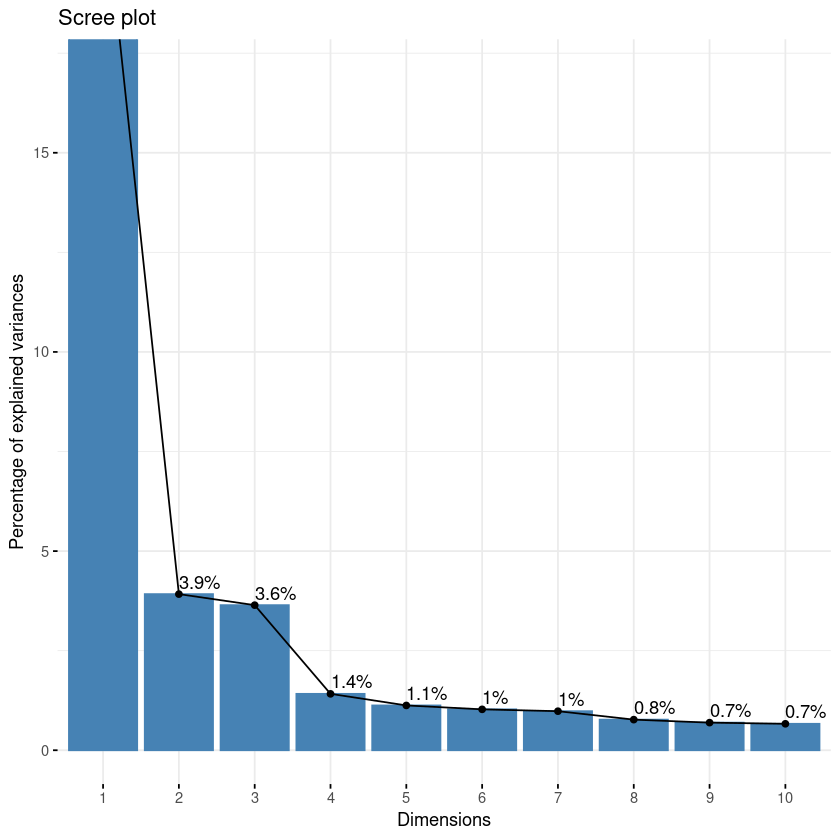

In [16]:
res = res_mca_region_annot
options(repr.plot.width = 7, repr.plot.height=7)
fviz_screeplot(res, addlabels = TRUE, ylim = c(0, 17))

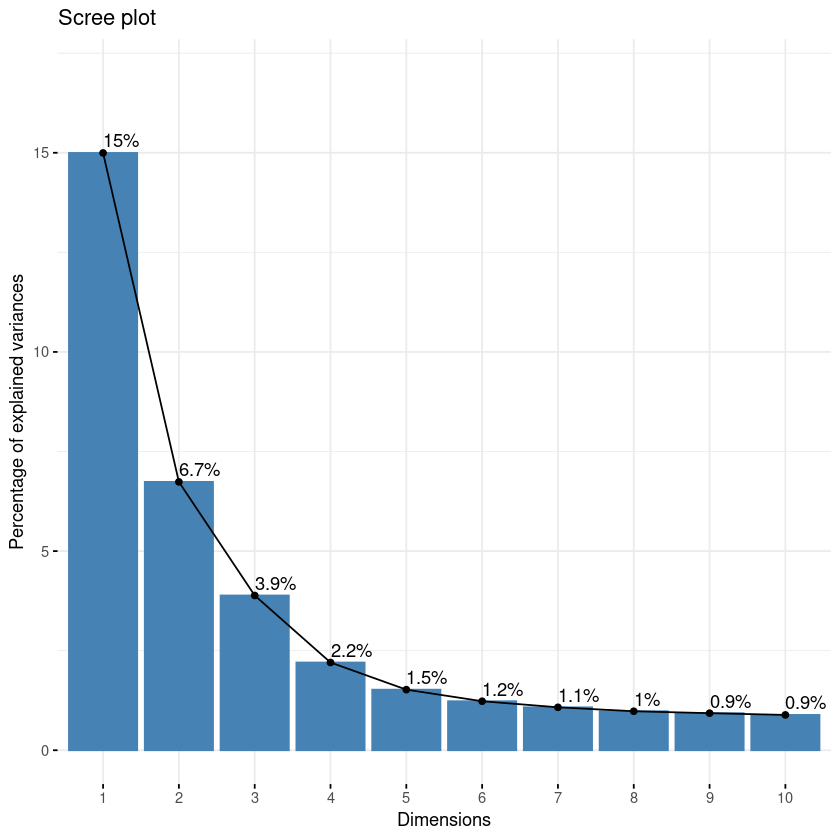

In [30]:
res = res_mca_region_annot
options(repr.plot.width = 7, repr.plot.height=7)
fviz_screeplot(res, addlabels = TRUE, ylim = c(0, 17))

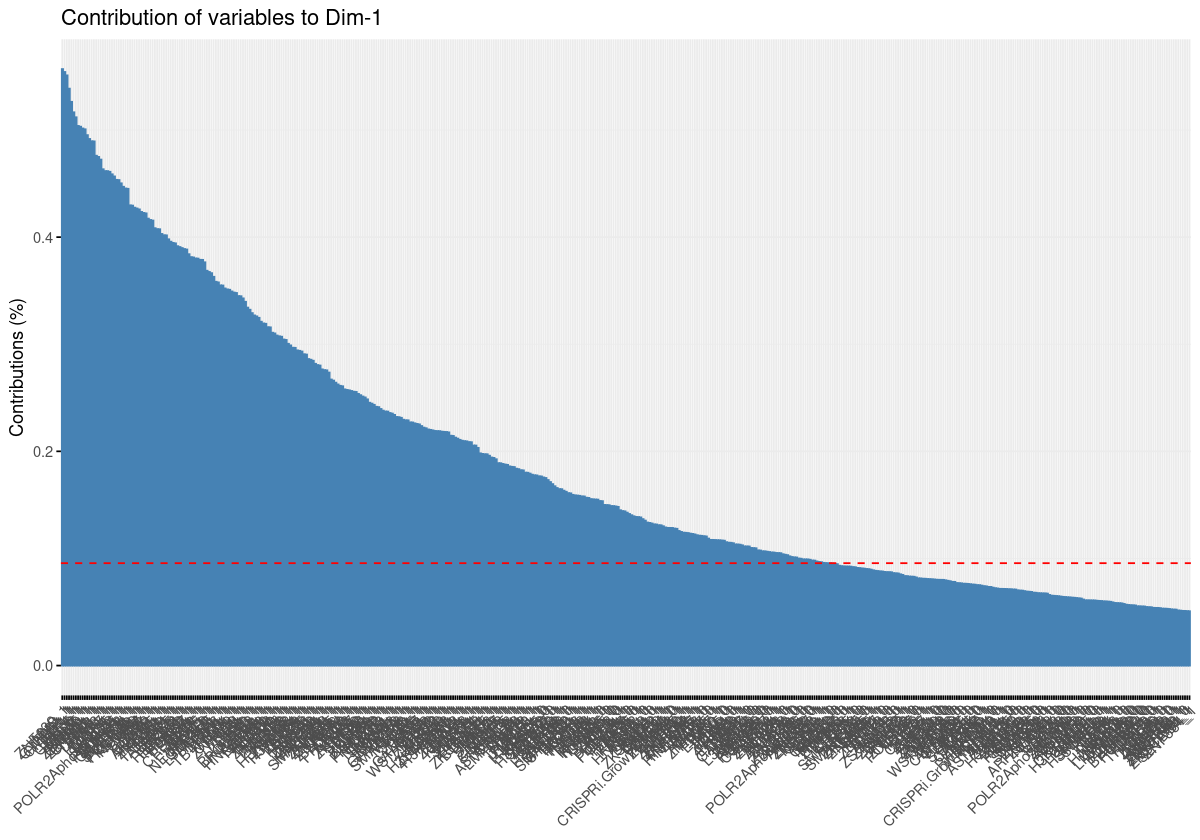

In [32]:
# Contributions of rows to dimension 1
options(repr.plot.width = 10, repr.plot.height=7)
fviz_contrib(res, choice = "var", axes = 1, top = 500)

In [118]:
res = res_mca_region_annot
lst = get_mca_var(res)

mat = lst$cos2
mat = mat[,1:20]

vec = apply(mat, 1, sum)
idx = order(-vec)

vec_num_index = idx[1:100]

In [119]:
res = res_mca_region_annot
lst = get_mca_var(res)
mat = lst$contrib

idx = vec_num_index
mat = mat[idx,]

vec = rownames(mat)

idx = str_detect(vec, pattern="_0$")
mat0 = mat[idx,]

idx = str_detect(vec, pattern="_1$")
mat1 = mat[idx,]

In [120]:
head(mat, 3)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,⋯,Dim 252,Dim 253,Dim 254,Dim 255,Dim 256,Dim 257,Dim 258,Dim 259,Dim 260,Dim 261
DLX4_0,7.105736e-05,0.0006754985,0.0002950982,0.0082637655,0.0001262234,2.807535e-06,0.0009757536,0.001746371,0.0001219763,0.0003520796,⋯,8.617077e-06,3.303283e-05,0.000021306,5.676938e-07,2.960894e-05,4.119305e-05,3.401279e-06,3.575571e-05,3.120814e-05,1.378048e-05
DLX4_1,4.097168e-02,0.3894924350,0.1701536428,4.7648871786,0.0727804062,1.618825e-03,0.5626195087,1.006957556,0.0703315623,0.2030091217,⋯,4.968606e-03,1.904673e-02,0.012285040,3.273322e-04,1.707252e-02,2.375191e-02,1.961177e-03,2.061674e-02,1.799461e-02,7.945825e-03
BDP1_1,8.521690e-04,0.0006529097,0.0015046392,0.0001205548,0.0061978067,6.625864e-03,0.2179766742,0.003426426,0.1414175001,0.0000306947,⋯,4.812155e-04,7.154440e-02,0.019338782,4.021981e-03,2.238351e-03,1.518813e-02,8.417664e-03,4.874568e-02,8.475026e-03,1.794578e-02


In [121]:
head(mat0, 3)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,⋯,Dim 252,Dim 253,Dim 254,Dim 255,Dim 256,Dim 257,Dim 258,Dim 259,Dim 260,Dim 261
DLX4_0,7.105736e-05,6.754985e-04,2.950982e-04,8.263765e-03,1.262234e-04,2.807535e-06,9.757536e-04,1.746371e-03,1.219763e-04,3.520796e-04,⋯,8.617077e-06,3.303283e-05,2.130600e-05,5.676938e-07,2.960894e-05,4.119305e-05,3.401279e-06,3.575571e-05,3.120814e-05,1.378048e-05
BDP1_0,2.951746e-07,2.261551e-07,5.211774e-07,4.175782e-08,2.146798e-06,2.295069e-06,7.550283e-05,1.186847e-06,4.898424e-05,1.063204e-08,⋯,1.666836e-07,2.478157e-05,6.698574e-06,1.393135e-06,7.753209e-07,5.260871e-06,2.915713e-06,1.688455e-05,2.935582e-06,6.216064e-06
POLR3G_0,2.951746e-07,2.261551e-07,5.211774e-07,4.175782e-08,2.146798e-06,2.295069e-06,7.550283e-05,1.186847e-06,4.898424e-05,1.063204e-08,⋯,1.666836e-07,2.478157e-05,6.698574e-06,1.393135e-06,7.753209e-07,5.260871e-06,2.915713e-06,1.688455e-05,2.935582e-06,6.216064e-06


In [122]:
head(mat1, 3)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,⋯,Dim 252,Dim 253,Dim 254,Dim 255,Dim 256,Dim 257,Dim 258,Dim 259,Dim 260,Dim 261
DLX4_1,0.040971675,0.3894924350,0.170153643,4.7648871786,0.072780406,0.001618825,0.5626195,1.006957556,0.07033156,0.2030091217,⋯,0.0049686063,0.01904673,0.01228504,0.0003273322,0.017072516,0.02375191,0.001961177,0.02061674,0.017994614,0.007945825
BDP1_1,0.000852169,0.0006529097,0.001504639,0.0001205548,0.006197807,0.006625864,0.2179767,0.003426426,0.14141750,0.0000306947,⋯,0.0004812155,0.07154440,0.01933878,0.0040219806,0.002238351,0.01518813,0.008417664,0.04874568,0.008475026,0.017945777
BRF1_1,0.000852169,0.0006529097,0.001504639,0.0001205548,0.006197807,0.006625864,0.2179767,0.003426426,0.14141750,0.0000306947,⋯,0.0004812155,0.07154440,0.01933878,0.0040219806,0.002238351,0.01518813,0.008417664,0.04874568,0.008475026,0.017945777


In [123]:
library("pheatmap")

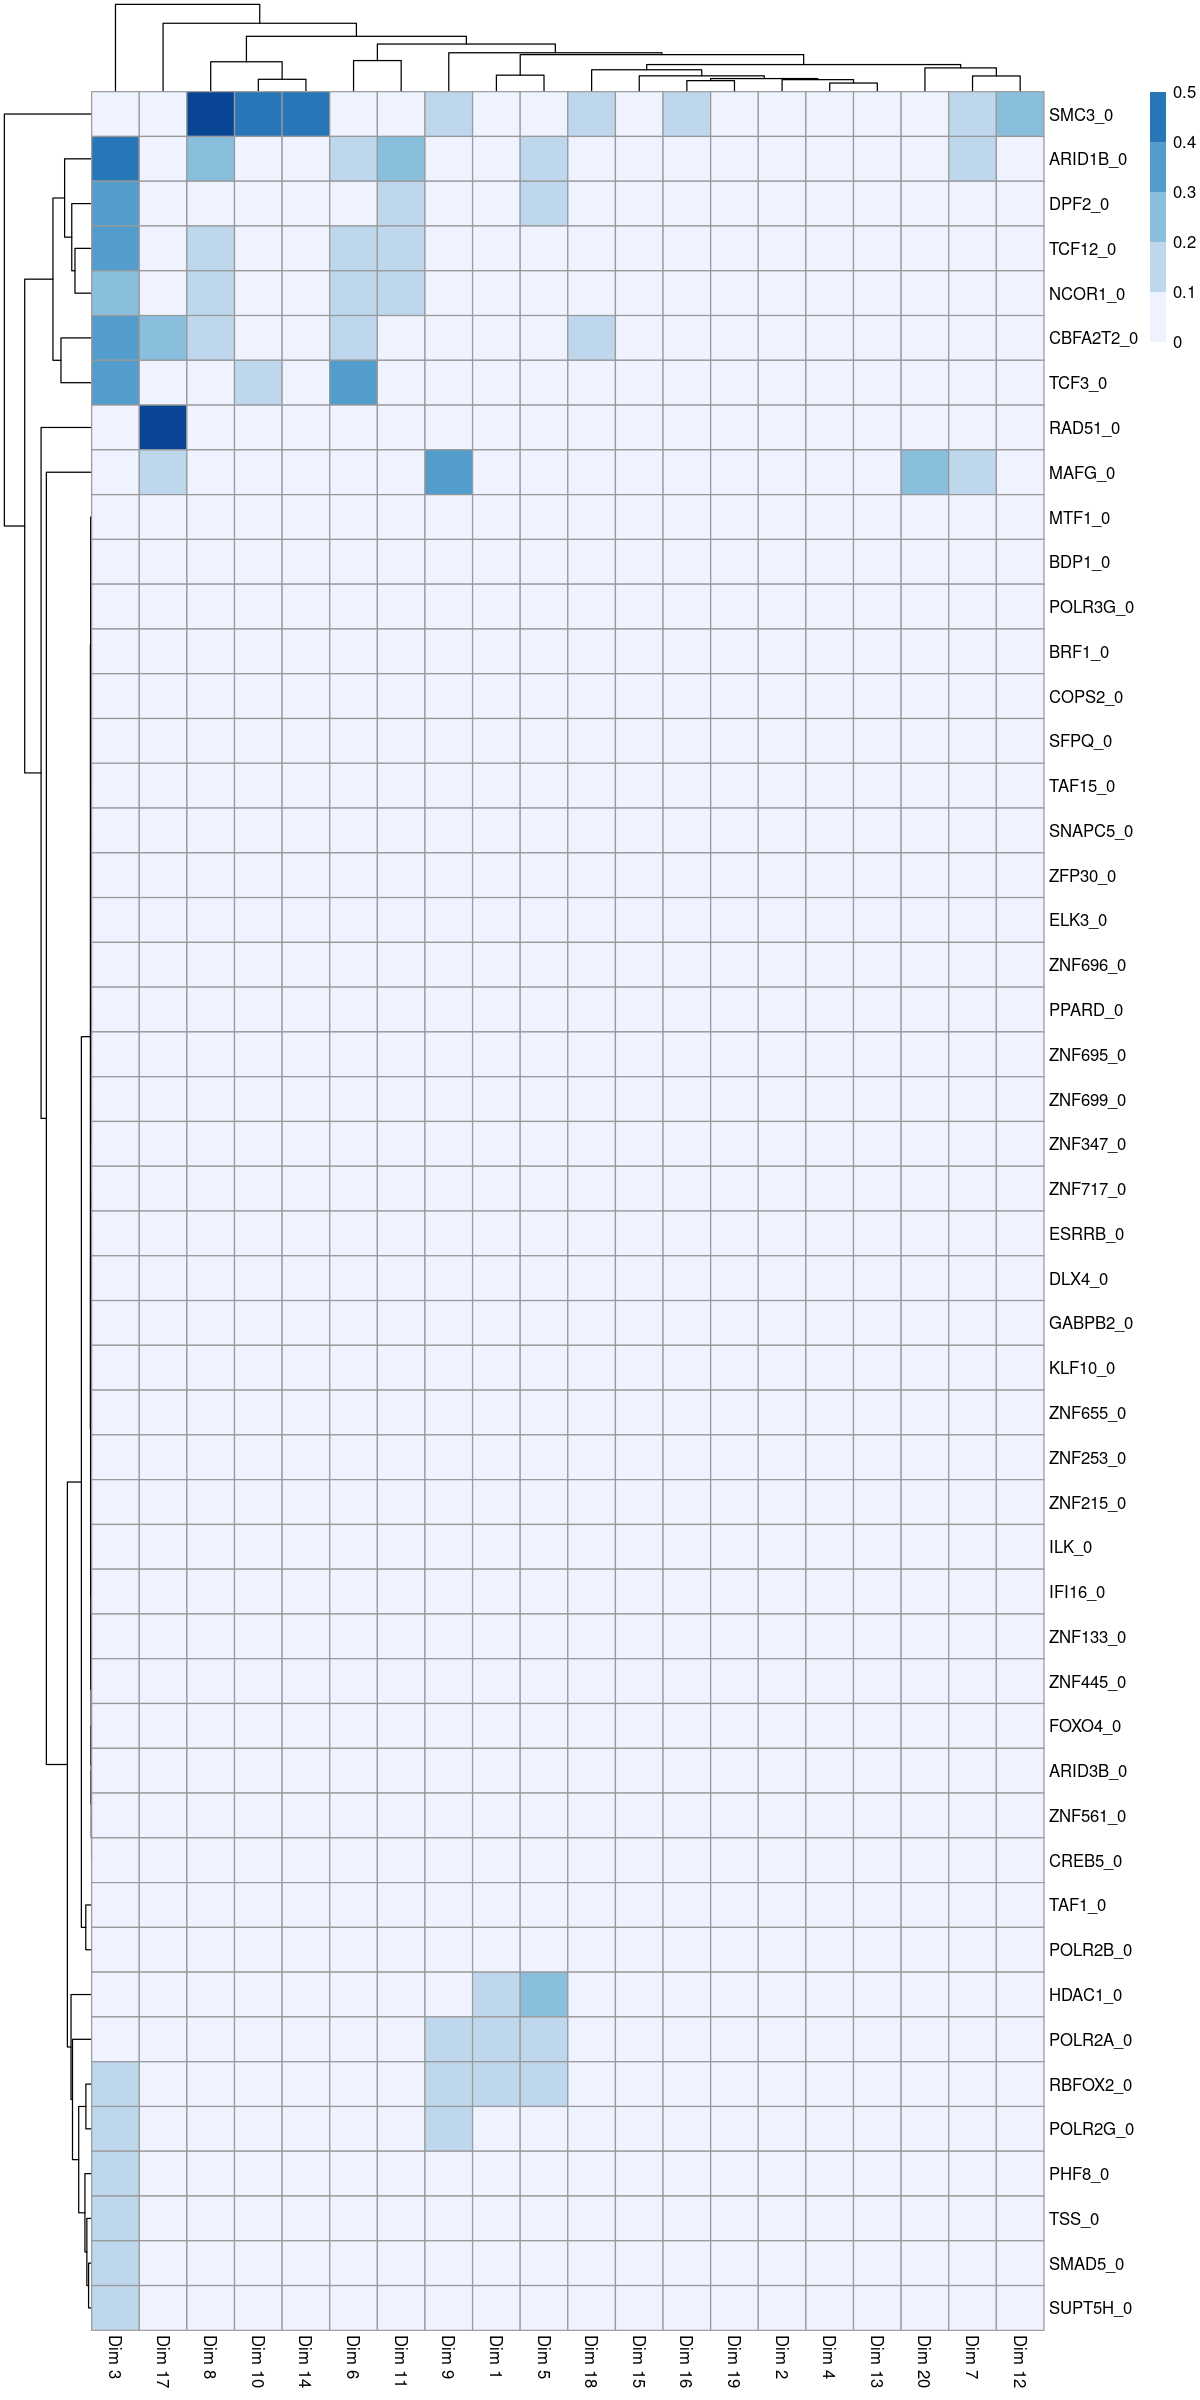

In [124]:
vec_num_break = seq(0, 0.5, by = 0.1)
vec_txt_color = colorRampPalette(brewer.pal(n = 7, name = "Blues"))(length(vec_num_break))

options(repr.plot.width = 10, repr.plot.height=20)
pheatmap(mat0[,1:20], color = vec_txt_color, breaks = vec_num_break, cex = 1)

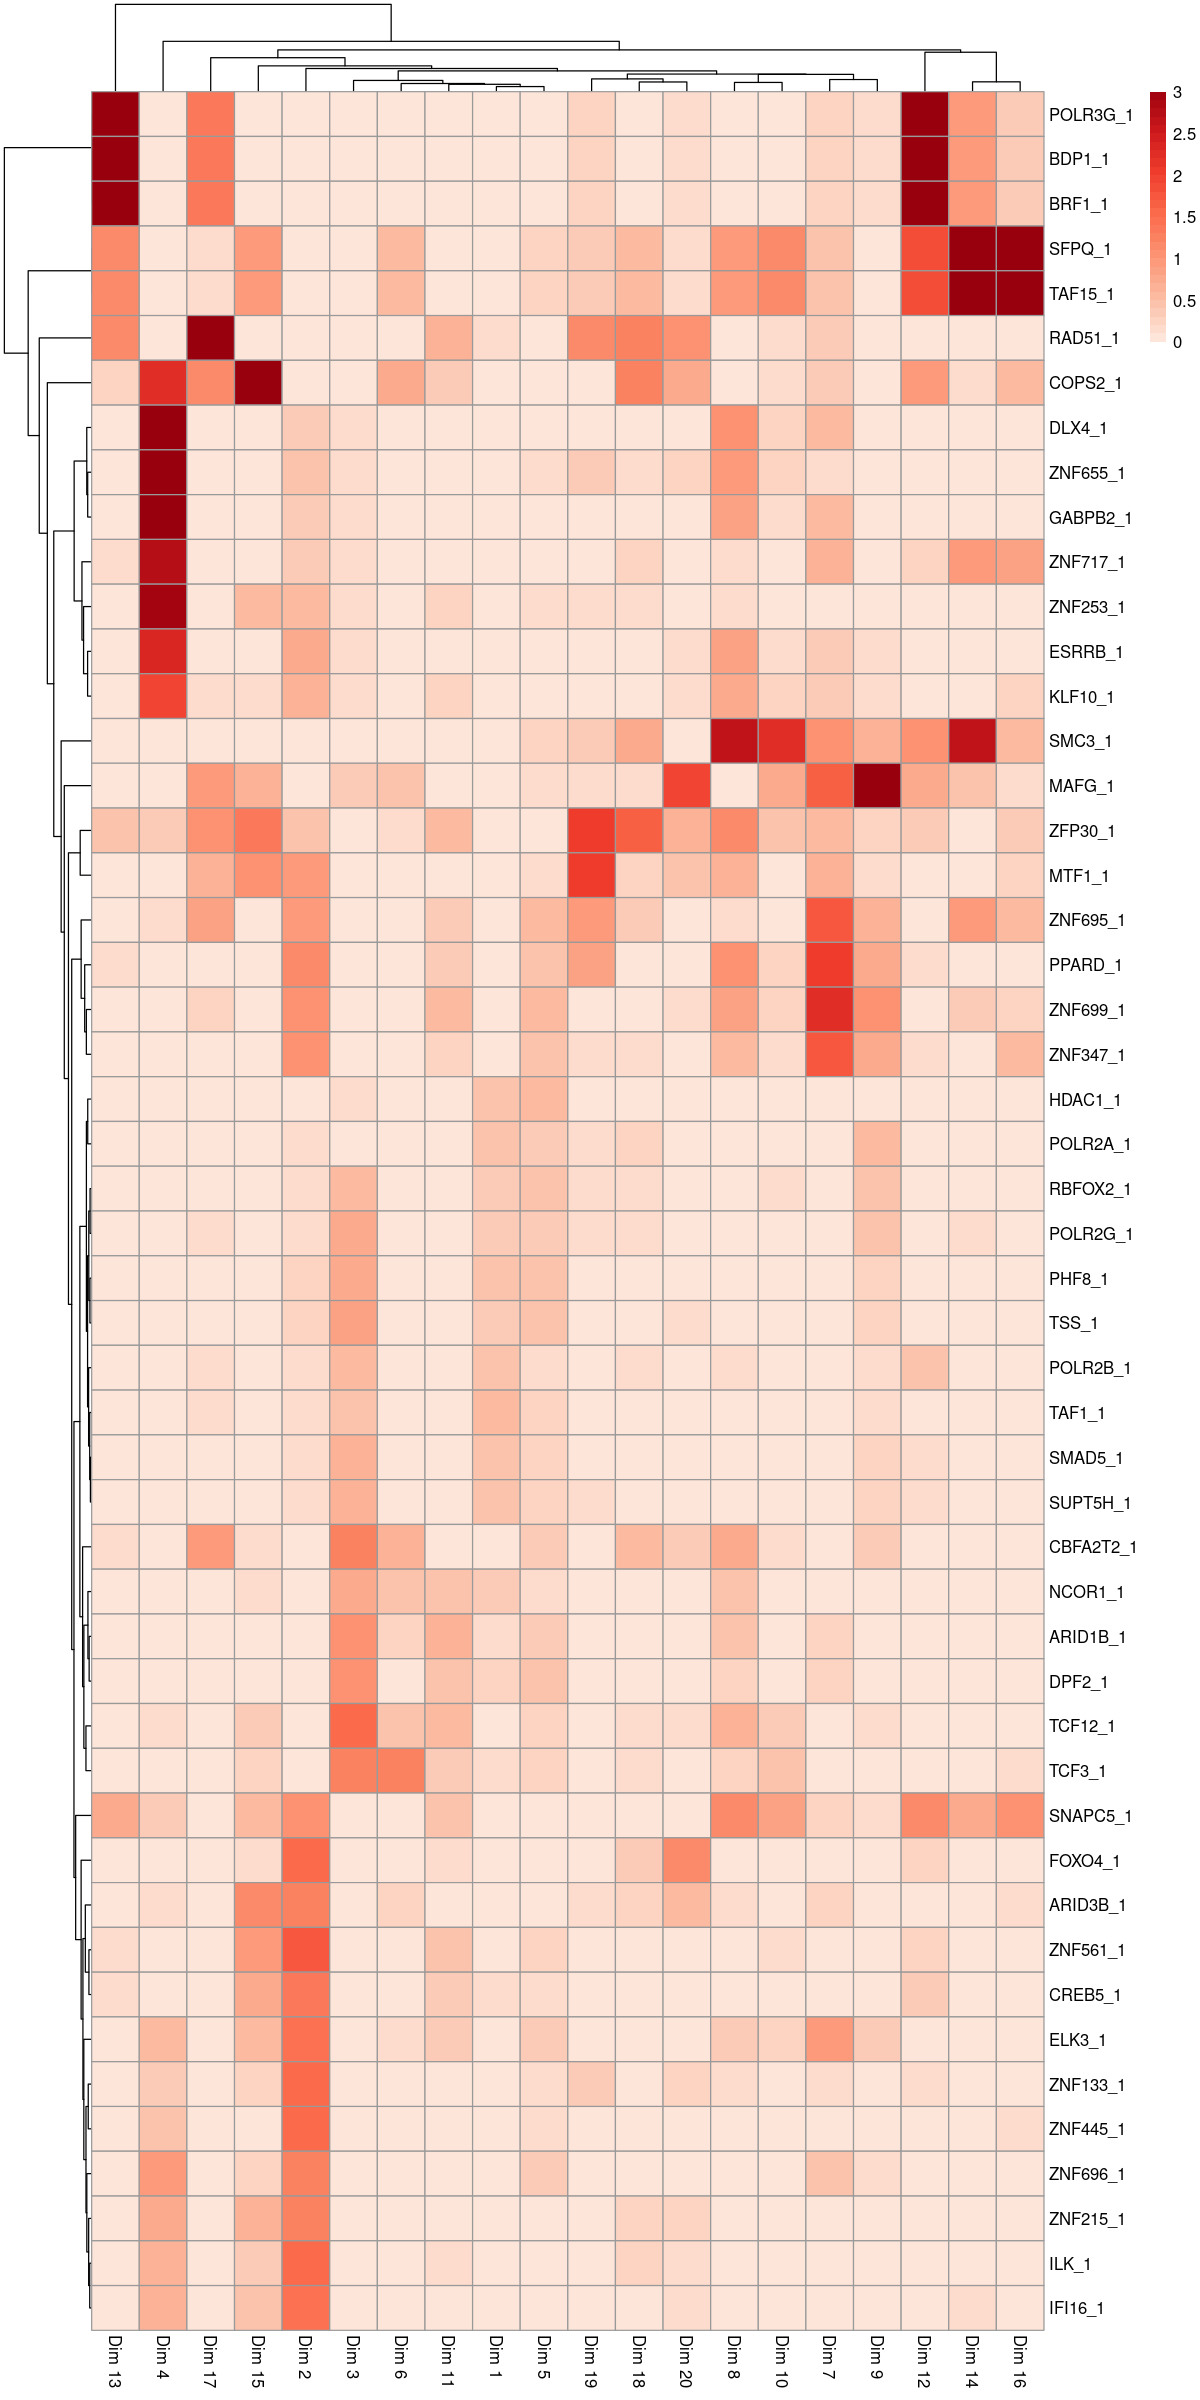

In [125]:
vec_num_break = seq(0, 3, by = 0.1)
vec_txt_color = colorRampPalette(brewer.pal(n = 7, name = "Reds"))(length(vec_num_break))

options(repr.plot.width = 10, repr.plot.height=20)
pheatmap(mat1[,1:20], color = vec_txt_color, breaks = vec_num_break)